# Estudo dos dados da base de dados servicosxis.db

Carlos Ramires

inicio: 22/11/2023
termino: 23/11/2023

Busca das distribuições para Entrada de Chamados e  Tecnicos para uma simulação de capacity

Tabelas importantes da servicosxos.db

servicos: Base raw \
serv_campo: base só com os serviços de campo \
qtd_servicos_'unidade': apresenta a distribuição dos serviços por mês de 2020-01 a 2023-07 \
qtd_tec_mes: Mostra a quantidade de técnicos por unidade por mês\
resumo_servicos: Mostra a quantidade por serviços, por unidade, no periodo\
servicos_mensal: Serviços de campo com Ano_Mes\
servicos_mes: Tem o total de serviços por mes, por unidade\
servicos_tec_mes: Relaciona o número de serviços, por serviço, por técnico, por mes\


# Avaliação das distribuições de entrada


Definição dos períodos de inicio / crecimento / estabilidade

ALG - jan20 - jul23
NGA - abr20 - jul23
PMJ - jan21 - jul23
CPE - abr21 - mar23
RBH - abr21 - jul23
SDN - abr21 - jul23 - descarte
NAA - jun21 - jul23 - quase linear

### Criada tabela serv_total_mensal_uni

Com a quantidade de serviços de campo prestados por unidade por mês de nov19 a jul23

### Calculadas as distribuições e seus parâmetros




### Assumption

#### Tempo médio de atendimento de um pedido

Considerando o tempo entre abertura e encerramento do chamado tem-se o tempo total do atendimento.

Em 

servicos_mes > Total de serviços/mes

serv_campo > serviços, causa, designado, duração

Dados espúrios serão descartados da seguinte maneira:




#### Tempo médio de execução de um serviço

Um mês tem 176 horas sendo 22 horas de instrução o que define 154 horas úteis

Considerando um fator de ponderação fp, 154 horas trabalhadas no mês e o número de serviços entregues, temos:

num_instal * fp + num_vt * fp + num_ret * fp + num_mud * fp = 154

Portanto, o fp de cada técico será:

fp =   154 / (num_instal + num_vt + num_ret + num_mud)

ou seja, o tempo médio dispendido para cada serviço deverá ser tm = num_serv * fp

### Número de Equipes disponíveis por mês

Em [serv_campo] identificar equipes válidas por unidade e contar equipes ativas mês a mês




In [2]:
import sqlite3
import pandas as pd

# Carrega a tabela servicos da base servicosxis.db para um dataframe

# Cria a conexão
cnx = sqlite3.connect('servicosxis.db')

# carrega tabela servicos em df
df = pd.read_sql_query("SELECT * FROM servicos_mes", cnx)

cnx.close()


In [13]:
# Cria uma df com as colunas Ano_Mes e Total de serviços

df_mensal = df.groupby('Ano_Mes')
total = df_mensal['Total'].sum()
total_di = total.to_dict()

# cria um df de um dicionario
df_total_mensal = pd.DataFrame.from_dict(total_di, orient='index', columns=['Total'])

# define o indice Ano_Mes
df_total_mensal.index.names = ['Ano_Mes']

# print(df_total_mensal)

In [16]:
# Cria uma tabela com os totais de serviços por unidade

unidades = ['ALG', 'NGA', 'PMJ', 'CPE', 'RBH', 'NAA', 'SDN']


for unidade in unidades:
    # separa df só com o técnico e seus serviços
    df_unidade = df['Unidade']== unidade
    df_unidade = df[df_unidade]
    df_group = df_unidade.groupby('Ano_Mes')
    total = df_group['Total'].sum()
    total_di = total.to_dict()
    
    # cria um df de um dicionario
    
    df_total = pd.DataFrame.from_dict(total_di, orient='index', columns=[unidade])
    # define o indice Ano_Mes
    df_total.index.names = ['Ano_Mes']

    df_total_mensal = df_total_mensal.merge(df_total, on='Ano_Mes', how='left')
    
df_total_mensal = df_total_mensal.fillna(0)
display(df_total_mensal)

,Total,ALG,NGA,PMJ,CPE,RBH,NAA,SDN
Ano_Mes,,,,,,,,
2019-11,11,11,0.0,0.0,0.0,0.0,0.0,0.0
2019-12,235,235,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,447,447,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,632,632,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,754,726,28.0,0.0,0.0,0.0,0.0,0.0
2020-04,1245,712,533.0,0.0,0.0,0.0,0.0,0.0
2020-05,1698,909,789.0,0.0,0.0,0.0,0.0,0.0
2020-06,2041,1106,935.0,0.0,0.0,0.0,0.0,0.0
2020-07,2371,1533,838.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# criar lista de serviços de entrada por unidade

lista =[]
l = df_total_mensal['ALG'].tolist()
for valor in l:
    if valor > 11:
        lista.append(valor)

print(lista)




[235, 447, 632, 726, 712, 909, 1106, 1533, 1098, 1535, 1201, 1115, 1089, 1357, 1204, 1521, 1138, 1115, 915, 854, 721, 604, 545, 654, 489, 522, 627, 500, 393, 480, 592, 626, 580, 480, 384, 362, 372, 374, 282, 399, 264, 295, 367, 246]


Melhor Distribuição: gamma
Melhores Parâmetros: (1.2694350990702377, 229.5948463567421, 384.8853101414259)


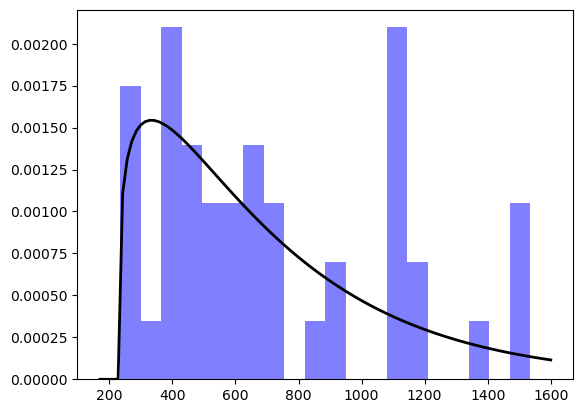

In [76]:
""" encontrar uma distribuição estatística que melhor represente uma lista 
de valores usando Python. Uma abordagem comum para fazer isso é ajustar os dados a 
diferentes distribuições de probabilidade e escolher a distribuição que melhor se ajusta
aos seus dados com base em critérios como o coeficiente de determinação (R²), o teste de 
aderência de Kolmogorov-Smirnov ou o critério de informação Akaike (AIC).

Aqui está um exemplo de como fazer isso usando a biblioteca scipy.stats:
"""
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista de valores 'data'
#data = [10.2, 11.5, 12.8, 9.7, 11.2, 14.1, 8.5, 10.3, 13.0, 12.1]

data = lista

# Ajustar os dados a diferentes distribuições
distributions = [stats.norm, stats.expon, stats.gamma, stats.lognorm]

best_fit = None
best_params = None
best_sse = float('inf')

for distribution in distributions:
    params = distribution.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    pdf = distribution.pdf(data, loc=loc, scale=scale, *arg)
    sse = np.sum((pdf - data)**2)
    
    if sse < best_sse:
        best_fit = distribution
        best_params = params
        best_sse = sse

# Agora você tem a melhor distribuição encontrada e seus parâmetros
print("Melhor Distribuição:", best_fit.name)
print("Melhores Parâmetros:", best_params)

# Você pode plotar o histograma dos dados e a PDF da melhor distribuição
plt.hist(data, bins=20, density=True, alpha=0.5, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = best_fit.pdf(x, *best_params)
plt.plot(x, p, 'k', linewidth=2)
plt.show()


In [5]:
# Monta um Gráfico 


from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

#df = df_tec_alg

app = Dash(__name__)
 # Monta o dropdown com a coluna country
app.layout = html.Div([
    html.H1(children='Serviços Totais', style={'textAlign':'center'}),
    dcc.Dropdown(df.Unidade.unique(), 'none', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
# Define os eixos x e y
def update_graph(value):
    dff = df[df.Unidade==value]
    return px.bar(dff, x='Ano_Mes', y='Total')

if __name__ == '__main__':
    app.run(debug=True, port=8080)

In [12]:
#Criar Tabela na base com os dados de Tecnicos

# 
# conectar a base

cnx = sqlite3.connect('servicosxis.db')

#Criando a tabela da unidade

tabela = ('serv_total_mensal_uni')

df_total_mensal.to_sql(tabela, cnx, if_exists='replace', index=True)

cnx.close()

In [25]:
#Criar Tabela na base com os dados 

# 
# conectar a base

cnx = sqlite3.connect('servicosxis.db')

#Criando a tabela da unidade

tabela = ('serv_campo_ok')

df_ok.to_sql(tabela, cnx, if_exists='replace', index=True)

cnx.close()


In [77]:
# Método para identificar os valores espúrios de uma série 
#    considerando fora algo +/- 2 x desvio_padrão

import numpy as np

# Suponha que 'dados' seja a sua série de dados
dados = [10, 15, 20, 25, 100, 30, 35, 40, 45]

media = np.mean(dados)
desvio_padrao = np.std(dados)

limite_superior = media + 2 * desvio_padrao
limite_inferior = media - 2 * desvio_padrao

outliers = [x for x in dados if x > limite_superior or x < limite_inferior]

print("Outliers:", outliers)


Outliers: [100]


In [78]:
# método de encontrar os dados espúrios a partir do desvio percentual (25% - 75%)

import numpy as np

# Suponha que 'dados' seja a sua série de dados
dados = [10, 15, 20, 25, 100, 30, 35, 40, 45]

q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)

iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = [x for x in dados if x > limite_superior or x < limite_inferior]

print("Outliers:", outliers)


Outliers: [100]


In [ ]:
# Criar uma lista com os dados de entrada para cada serviço de cada unidade para 
# encontrar a melhor distribuição que a representa





In [ ]:
# Criar uma tabela com os dados de performance de cada técnico
# relacionando o número de serviços executados por mês com o número de horas trabalhadas
# considerar: 
# 